# Introduction

Readmission has been an ongoing issue in Healthcare. For this project, I am going to use a dataset provided by Medicare.gov and see if I can improve the Predicted Readmission Rate provided by using Linear Regression and Random Forest Algorithm. If I cannot improve it, I will need to justify the reason.

# Import Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# Read File 

In [2]:
hospital = pd.read_csv('Hospital_Readmissions_Reduction_Program.csv')

In [3]:
hospital.head(7)

,Facility Name,Facility ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-AMI-HRRP,742.0,NaN,1.0446,15.2935,14.6404,116,07/01/2015,06/30/2018
1,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-CABG-HRRP,279.0,NaN,1.2361,14.5943,11.8065,46,07/01/2015,06/30/2018
2,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-COPD-HRRP,495.0,NaN,1.0249,18.6162,18.1637,94,07/01/2015,06/30/2018
3,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-HF-HRRP,1114.0,NaN,1.0453,22.3772,21.4082,252,07/01/2015,06/30/2018
4,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-HIP-KNEE-HRRP,301.0,NaN,1.1787,5.5863,4.7392,20,07/01/2015,06/30/2018
5,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-PN-HRRP,605.0,NaN,1.0049,16.8059,16.7237,102,07/01/2015,06/30/2018
6,MARSHALL MEDICAL CENTERS SOUTH CAMPUS,10005,AL,READM-30-AMI-HRRP,NaN,NaN,0.9255,14.1024,15.2379,Too Few to Report,07/01/2015,06/30/2018


In [4]:
hospital.describe()

,Facility ID,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate
count,19344.000000,11440.000000,5274.000000,14071.000000,14071.000000,14071.000000
mean,262195.596154,393.304808,3.635950,1.002507,15.383346,15.337661
std,162257.586241,363.203205,1.981472,0.089052,5.959672,5.778370
min,10001.000000,0.000000,1.000000,0.623000,2.199400,2.799700
25%,110110.500000,158.000000,1.000000,0.950850,13.285200,13.540200
50%,250089.000000,290.000000,5.000000,0.997800,16.712700,16.639300
75%,390117.500000,508.000000,5.000000,1.049400,19.559800,19.647700
max,670128.000000,9356.000000,23.000000,2.183200,30.257900,25.697100


# Check For Missing Values

In [5]:
hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19344 entries, 0 to 19343
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Facility Name               19344 non-null  object 
 1   Facility ID                 19344 non-null  int64  
 2   State                       19344 non-null  object 
 3   Measure Name                19344 non-null  object 
 4   Number of Discharges        11440 non-null  float64
 5   Footnote                    5274 non-null   float64
 6   Excess Readmission Ratio    14071 non-null  float64
 7   Predicted Readmission Rate  14071 non-null  float64
 8   Expected Readmission Rate   14071 non-null  float64
 9   Number of Readmissions      14071 non-null  object 
 10  Start Date                  19344 non-null  object 
 11  End Date                    19344 non-null  object 
dtypes: float64(5), int64(1), object(6)
memory usage: 1.8+ MB


In [6]:
hospital.isnull().sum()

Facility Name                     0
Facility ID                       0
State                             0
Measure Name                      0
Number of Discharges           7904
Footnote                      14070
Excess Readmission Ratio       5273
Predicted Readmission Rate     5273
Expected Readmission Rate      5273
Number of Readmissions         5273
Start Date                        0
End Date                          0
dtype: int64

One of the best way to check for missing values is to create a heatmap. This lets me determine if I should drop the column entirely or find the average instead

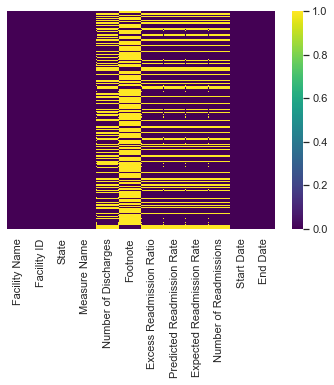

In [7]:
sns.heatmap(hospital.isnull(),yticklabels=False, cmap = 'viridis')

By looking at the heatmap, I can tell that "Footnote" has too many missing values to become relevant in this project so I am going to drop it. In addition, 'Number of Discharges', 'Excess Readmission Ratio','Predicted Readmission Rate','Expected Readmission Rate', and 'Number of Readmissions' can be filled by applying the mean.

# Data Cleaning

In [8]:
hospital.columns

Index(['Facility Name', 'Facility ID', 'State', 'Measure Name',
       'Number of Discharges', 'Footnote', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions', 'Start Date', 'End Date'],
      dtype='object')

#Dropping Variables that are not applicable

In [9]:
hospital.drop('Footnote',axis =1, inplace = True)

In [10]:
hospital['Number of Discharges'].mean()

393.3048076923077

In [11]:
type(hospital['Number of Discharges'][6])

numpy.float64

By using fillna, I am able to replace all missing values with the mean of each features.

In [12]:
hospital.fillna(hospital.mean(),inplace = True)

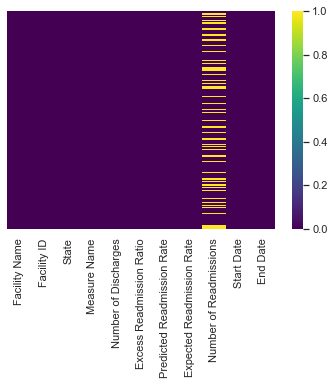

In [13]:
sns.heatmap(hospital.isnull(),yticklabels=False, cmap = 'viridis')

In [14]:
hospital.head(8)

,Facility Name,Facility ID,State,Measure Name,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-AMI-HRRP,742.000000,1.044600,15.293500,14.640400,116,07/01/2015,06/30/2018
1,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-CABG-HRRP,279.000000,1.236100,14.594300,11.806500,46,07/01/2015,06/30/2018
2,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-COPD-HRRP,495.000000,1.024900,18.616200,18.163700,94,07/01/2015,06/30/2018
3,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-HF-HRRP,1114.000000,1.045300,22.377200,21.408200,252,07/01/2015,06/30/2018
4,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-HIP-KNEE-HRRP,301.000000,1.178700,5.586300,4.739200,20,07/01/2015,06/30/2018
5,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-PN-HRRP,605.000000,1.004900,16.805900,16.723700,102,07/01/2015,06/30/2018
6,MARSHALL MEDICAL CENTERS SOUTH CAMPUS,10005,AL,READM-30-AMI-HRRP,393.304808,0.925500,14.102400,15.237900,Too Few to Report,07/01/2015,06/30/2018
7,MARSHALL MEDICAL CENTERS SOUTH CAMPUS,10005,AL,READM-30-CABG-HRRP,393.304808,1.002507,15.383346,15.337661,NaN,07/01/2015,06/30/2018


It seems most of the data were filled with the average except for 'Number of Readmissions'. To figure out the case, lets observe the values in 'Number of Readmissions'

By looking at vlaue counts, there is a text that read "Too Few to Report", which is a string function. In order to fix this, I am going to convert 'Too few to Report' to 0.

In [15]:
hospital['Number of Readmissions'].replace('Too Few to Report', '0' ,inplace = True) 

Trying to find the mean for 'Number of Readmission' was challenging because it contains differnt data types. In order to fix this, I am going to convert all of the data into float.

In [16]:
type(hospital['Number of Readmissions'][3])

str

In [17]:
hospital['Number of Readmissions'] = hospital['Number of Readmissions'].astype(float)

Now I am going to find the mean and replace all missing values with the mean

In [18]:
hospital['Number of Readmissions'].mean()

50.47423779404449

In [19]:
hospital['Number of Readmissions'].fillna(hospital['Number of Readmissions'].mean(), inplace = True)

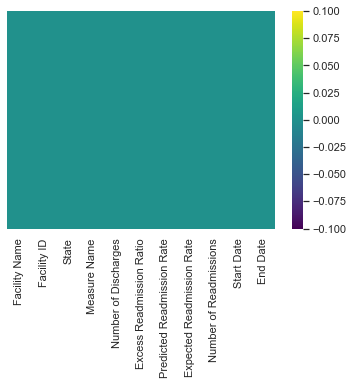

In [20]:
sns.heatmap(hospital.isnull(),yticklabels=False,cmap = 'viridis')

Now that Data Cleaning is complete, Lets do some Data Visualization

# Data Visualization

In [21]:
hospital.columns

Index(['Facility Name', 'Facility ID', 'State', 'Measure Name',
       'Number of Discharges', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions', 'Start Date', 'End Date'],
      dtype='object')

I wanted to create a plot that see a correlation between exptected Readmission Rate and Predicted Readmission Rate. By looking at the correlation, we can measure the accuracy of the model

Text(0.5, 1, 'Predicted Readmission Rate vs Expected Readmission Rate')

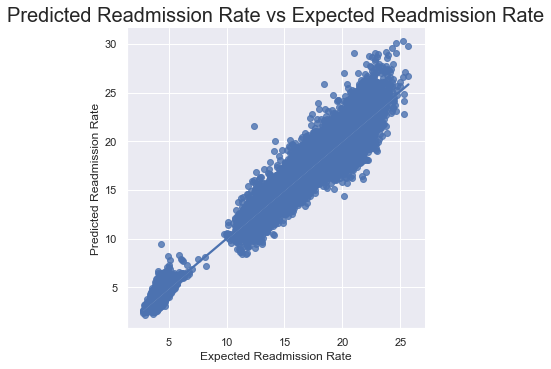

In [22]:
sns.lmplot('Expected Readmission Rate','Predicted Readmission Rate', data = hospital)
plt.title('Predicted Readmission Rate vs Expected Readmission Rate',size = 20)

Text(0.5, 1, 'Expected Readmission Rate vs Number of Discharges')

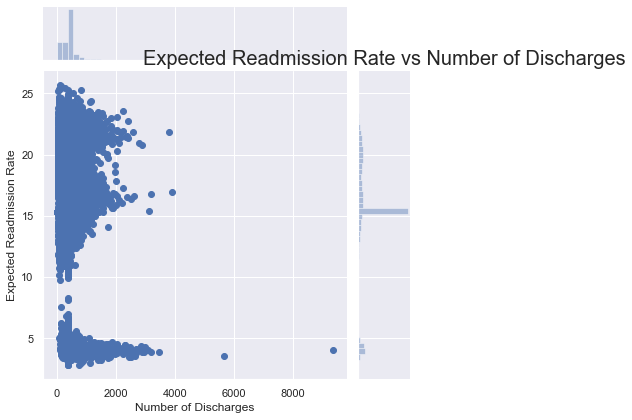

In [23]:
sns.jointplot(x= hospital['Number of Discharges'],y=hospital['Expected Readmission Rate'])
plt.title('Expected Readmission Rate vs Number of Discharges',size = 20)

Text(0.5, 1, 'Expected Readmission Rate vs Number of Readmission')

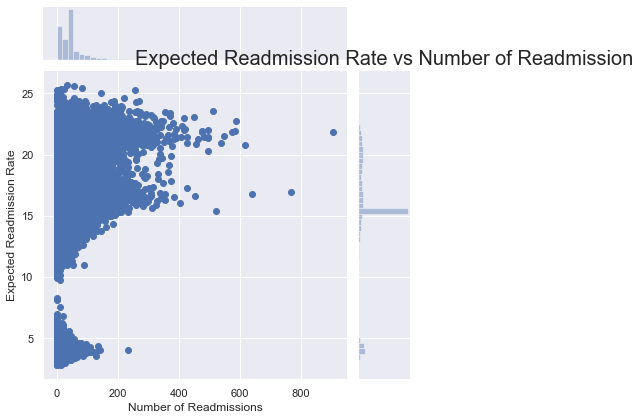

In [24]:
sns.jointplot(x= hospital['Number of Readmissions'],y=hospital['Expected Readmission Rate'])
plt.title('Expected Readmission Rate vs Number of Readmission',size = 20)

# Scale Data

after looking at our data, I am going to scale the dataset. Scaling data is very important because it helps normalize the data in a particular range.

In [25]:
hospital.columns

Index(['Facility Name', 'Facility ID', 'State', 'Measure Name',
       'Number of Discharges', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions', 'Start Date', 'End Date'],
      dtype='object')

Time to select my dependentand independent variables.

In [26]:
x = hospital[['Number of Discharges','Excess Readmission Ratio','Number of Readmissions']]
y = hospital['Expected Readmission Rate']

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scale = StandardScaler()

In [29]:
scale.fit_transform(x)

array([[ 1.24846220e+00,  5.54234014e-01,  1.27677786e+00],
       [-4.09254946e-01,  3.07568717e+00, -8.71810959e-02],
       [ 3.64107698e-01,  2.94846927e-01,  8.48105046e-01],
       ...,
       [-2.03521188e-16, -2.33890368e-14,  1.38450161e-16],
       [-2.03521188e-16, -2.33890368e-14,  1.38450161e-16],
       [-2.03521188e-16, -2.33890368e-14,  1.38450161e-16]])

# Train Test Split

I am going to determine the type of machine learning algorithm needed for this. Since I am going to predict readmission rate and compare it with the given readmission rate, I will use being with linear regression and try to improve it.

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=.2, random_state = 101)

# Linear Regression 

Since we are trying to predict the progression of readmission rate, I will use Linear Regression and then compare it with different linear regression models

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
LR = LinearRegression()

Fittng the model in our regression 

In [34]:
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

using the model to find the coef and putting it into a dataframe

In [35]:
print(LR.intercept_)

29.817563996362967


In [36]:
LR.coef_

array([ -0.01433401, -13.59309106,   0.09465686])

In [37]:
cdf = pd.DataFrame(LR.coef_,x.columns,columns=['Coeff'])

In [38]:
cdf.head()

,Coeff
Number of Discharges,-0.014334
Excess Readmission Ratio,-13.593091
Number of Readmissions,0.094657


# Predictions

In [39]:
pred = LR.predict(x_test)

plotting a residual plot

Text(0.5, 1.0, 'Residual Plot')

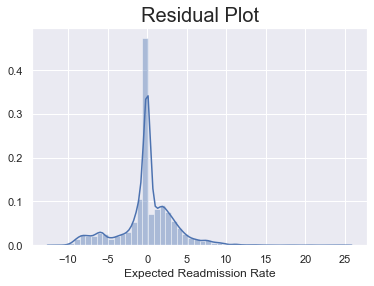

In [40]:
sns.distplot(y_test - pred)
plt.title('Residual Plot',size =20)

# Evaluation Metrics

In [41]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [42]:
print('MAE:', mean_absolute_error(y_test,pred))
print('MSE:', mean_squared_error(y_test,pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test,pred)))

MAE: 2.2190802720499736
MSE: 11.787763409640355
RMSE: 3.433331240885498


Lets see if we can improve the score by comparing it to Regression Tree

# Random Forest 

Importing the model and fitting the model

In [43]:
from sklearn.ensemble import RandomForestRegressor

choosing an estimator of 500 for random forest

In [44]:
rf = RandomForestRegressor(n_estimators=1000)

In [45]:
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [46]:
rf_pred = rf.predict(x_test)

In [47]:
rf.score(x_train,y_train)

0.915005659210661

Text(0.5, 1.0, 'Residual Plot')

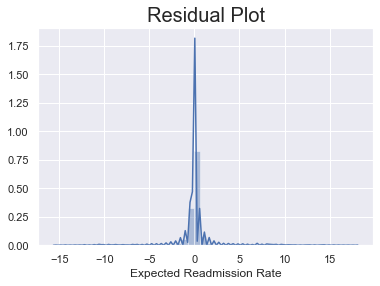

In [48]:
sns.distplot(y_test - rf_pred)
plt.title('Residual Plot',size = 20)

In [49]:
print('MAE:', mean_absolute_error(y_test,rf_pred))
print('MSE:', mean_squared_error(y_test,rf_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test,rf_pred)))

MAE: 0.9990227695108825
MSE: 6.571964386758269
RMSE: 2.563584285089583


# Comparing our results with Predicted Readmission Rate

Choosing our comparison features

In [50]:
X = hospital['Expected Readmission Rate']
Y = hospital['Predicted Readmission Rate']

In [51]:
X_reshape = X.values.reshape(-1,1)

In [52]:
lr= LinearRegression()

fitting our model

In [53]:
lr.fit(X_reshape,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
lr.score(X_reshape,Y)

0.958026742055004

Random Forest's coefficient of determination value of our training set

In [55]:
rf.score(x_train,y_train)

0.915005659210661

Linear Regression's coefficient of determination value of our training set

In [56]:
LR.score(x_train,y_train)

0.4925755747151835

Looking at my result, I noticed that Random Forest has the highest score for our machine learning algorithm. However, it did not beat the Predicted Readmission Rate data. Why is this the case? One reason is the model Medicare used could have more features to perform a better prediction compared to the data given. Another reason could be that it used a different set of train/test ratio. Even though our prediction did not beat the data provided, it did a very good job in its prediction. 